In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 프로젝트 루트 경로를 sys.path에 추가 (노트북이 notebooks/ 아래에서 실행된다고 가정)
PROJECT_ROOT = os.path.abspath(os.path.join(".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"

DATA_PATH = os.path.join(PROJECT_ROOT, "data", "processed", "prices.csv")
DATA_PATH

'c:\\Users\\ohsy1\\OneDrive\\바탕 화면\\RL Assignment\\results\\data\\processed\\prices.csv'

In [2]:
price_df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)
price_df.head()

,SEC,HYU,NAVER
Date,,,
2010-01-01,15980,121000,60269
2010-01-02,15980,121000,60269
2010-01-03,15980,121000,60269
2010-01-04,16180,119000,60583
2010-01-05,16440,110000,60583


In [3]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5809 entries, 2010-01-01 to 2025-11-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SEC     5809 non-null   int64
 1   HYU     5809 non-null   int64
 2   NAVER   5809 non-null   int64
dtypes: int64(3)
memory usage: 181.5 KB


In [4]:
price_df.describe()

,SEC,HYU,NAVER
count,5809.000000,5809.000000,5809.000000
mean,44543.933551,181784.558444,166806.432260
std,21153.590884,43752.150095,85758.116242
min,13600.000000,65900.000000,50538.000000
25%,25880.000000,144000.000000,111000.000000
50%,44800.000000,181000.000000,154820.000000
75%,60400.000000,219000.000000,199800.000000
max,111100.000000,298000.000000,454000.000000


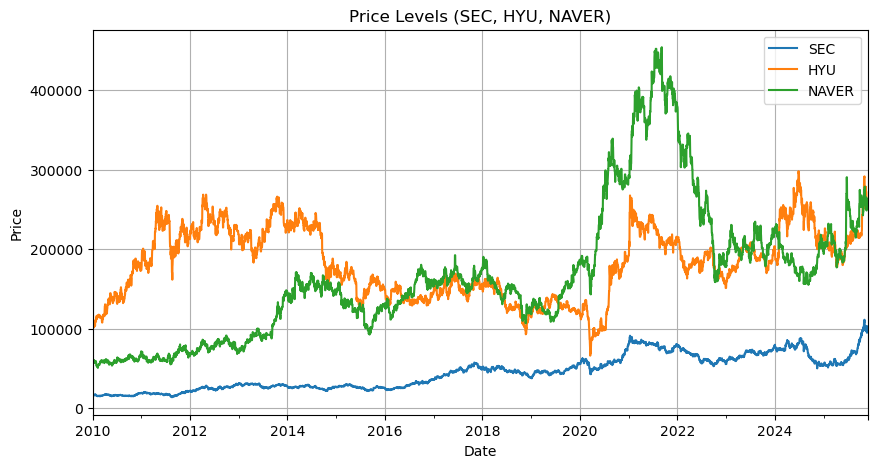

In [5]:
asset_cols = ["SEC", "HYU", "NAVER"]

price_df[asset_cols].plot(title="Price Levels (SEC, HYU, NAVER)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [6]:
ret_df = price_df[asset_cols].pct_change().dropna()
ret_df.head()

,SEC,HYU,NAVER
Date,,,
2010-01-02,0.000000,0.000000,0.000000
2010-01-03,0.000000,0.000000,0.000000
2010-01-04,0.012516,-0.016529,0.005210
2010-01-05,0.016069,-0.075630,0.000000
2010-01-06,0.023114,0.009091,-0.005183


In [7]:
ret_df.describe()

,SEC,HYU,NAVER
count,5808.000000,5808.000000,5808.000000
mean,0.000420,0.000276,0.000424
std,0.014130,0.017010,0.018517
min,-0.103015,-0.109661,-0.139536
25%,-0.004278,-0.005765,-0.005832
50%,0.000000,0.000000,0.000000
75%,0.004872,0.004484,0.005208
max,0.104706,0.194175,0.179177


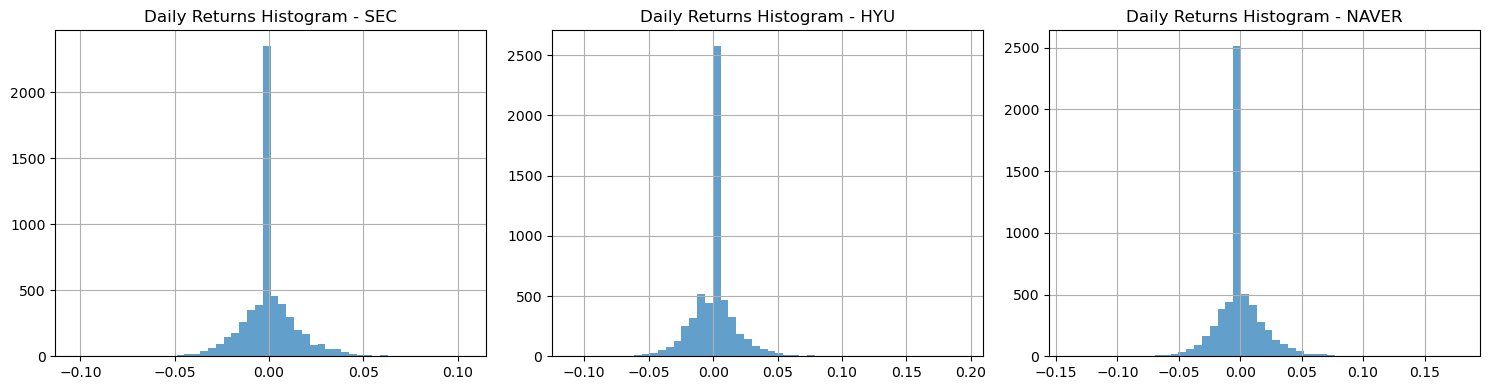

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(asset_cols):
    axes[i].hist(ret_df[col], bins=50, alpha=0.7)
    axes[i].set_title(f"Daily Returns Histogram - {col}")

plt.tight_layout()
plt.show()

In [9]:
corr = ret_df.corr()
corr

,SEC,HYU,NAVER
SEC,1.000000,0.329975,0.244622
HYU,0.329975,1.000000,0.162717
NAVER,0.244622,0.162717,1.000000


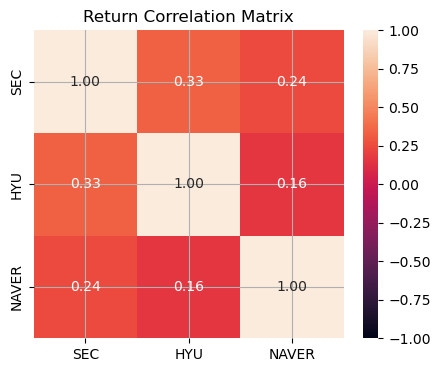

In [10]:
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Return Correlation Matrix")
plt.show()

In [11]:
train_df = price_df.loc[:"2016-12-30"]
valid_df = price_df.loc["2017-01-02":"2019-12-30"]
test_df  = price_df.loc["2020-01-02":]

len(train_df), len(valid_df), len(test_df)

(2556, 1093, 2156)

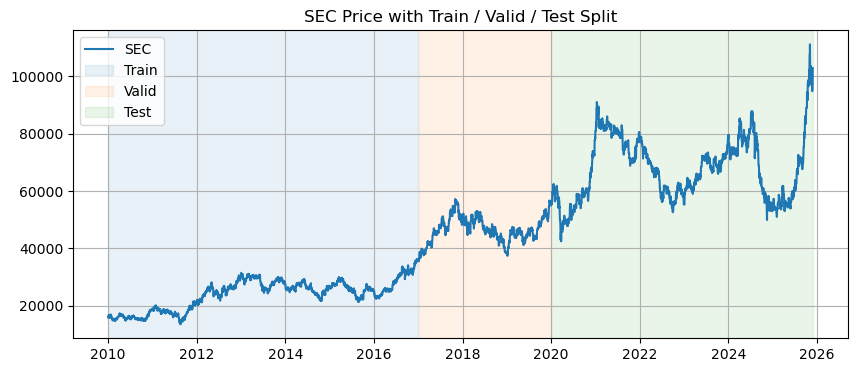

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(price_df.index, price_df["SEC"], label="SEC")
ax.axvspan(train_df.index[0], train_df.index[-1], color="tab:blue", alpha=0.1, label="Train")
ax.axvspan(valid_df.index[0], valid_df.index[-1], color="tab:orange", alpha=0.1, label="Valid")
ax.axvspan(test_df.index[0],  test_df.index[-1],  color="tab:green", alpha=0.1, label="Test")
ax.set_title("SEC Price with Train / Valid / Test Split")
ax.legend()
plt.show()